# Домашняя работа №5

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [2]:
import ssl
# следующая строчка подключает сертификат для защищенного соединения
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
len(data[data['Dataset']==2])

167

In [4]:
len(data[data['Dataset']==1])

416

Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

## Посчитать корреляцию Пирсона для Direct_Bilirubin и Total_Bilirubin.

In [5]:
from scipy.stats import pearsonr
pearsonr(data.Direct_Bilirubin, data.Total_Bilirubin)

(0.8746179301164133, 7.873553178026405e-185)

## Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [6]:
Direct_Bilirubin = data['Direct_Bilirubin']
Total_Bilirubin = data['Total_Bilirubin']

In [7]:
direct_bilirubin = np.array(Direct_Bilirubin).reshape(-1,1)
total_bilirubin = np.array(Total_Bilirubin).reshape(-1,1)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    direct_bilirubin,
    total_bilirubin,
    test_size = 0.2
)

In [10]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
predicted_y = model.predict(X_test)

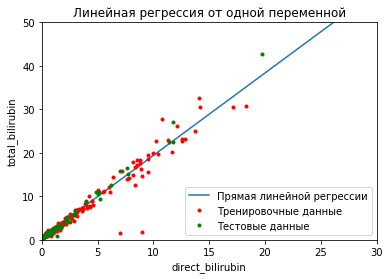

In [19]:
plt.xlabel('direct_bilirubin')
plt.ylabel('total_bilirubin')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(0, 30, 5)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'g.')
plt.xlim(0,30)
plt.ylim(0,50)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [20]:
age = data['Age']

In [21]:
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [22]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [23]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


## Посчитать квартили для всех **колонок**. 

In [24]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


## Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

In [25]:
data_1 = data.loc[data.Age < 50]
data_2 = data.loc[data.Age >= 50]

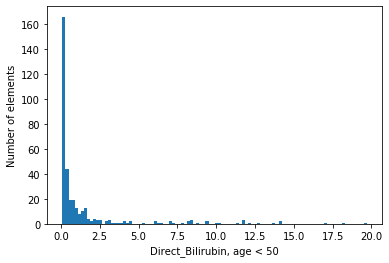

In [28]:
plt.hist(data_1.Direct_Bilirubin, 100)
plt.xlabel('Direct_Bilirubin, age < 50')
plt.ylabel('Number of elements')
plt.show()

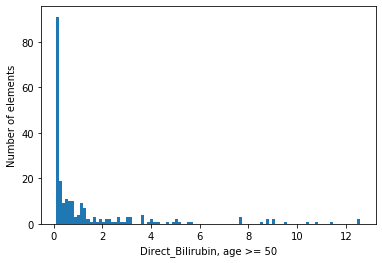

In [29]:
plt.hist(data_2.Direct_Bilirubin, 100)
plt.xlabel('Direct_Bilirubin, age >= 50')
plt.ylabel('Number of elements')
plt.show()

In [31]:
data_1.Direct_Bilirubin.mean()

1.4946175637393755

In [32]:
data_2.Direct_Bilirubin.mean()

1.4730434782608677

In [34]:
data_1.Direct_Bilirubin.quantile(.50) 

0.3

In [35]:
data_2.Direct_Bilirubin.quantile(.50) 

0.4

Среднее значение Direct_Bilirubin у первой группы больше, чем у второй. При этом медиана меньше.

## Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность (все люди из выборки)? Сравнить t-критерий с табличным показателем граничного t-критерия Стьюдента. alpha = 0.05, доверительная вероятность 95%. Число степеней свободы = (количество людей больных (выборки полученной) - 1)

In [37]:
data['Total_Bilirubin'].mean()

3.298799313893652

In [38]:
len(data[data['Dataset']==1])

416

In [39]:
seak = data[data['Dataset']==1]['Total_Bilirubin']
stats.ttest_1samp(seak, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

t-value = 2.471063305746647, сравниваем с табличным значением 1.97 
(alpha = 0.05, N=415). Так как значение t-value превышает 1.97, то мы не принимаем нулевую гипотезу (о том, что средние значения Total_Bilirubin у больных и всех людей равны). 

In [ ]:
from IPython.display import Image
Image('https://sun9-13.userapi.com/c858132/v858132950/17426d/O9zG6rdfid4.jpg', width=600)

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). В данном случае сравниваем p-value. Имеют ли данные группы схожесть?

In [42]:
stats.ttest_1samp(seak, data[data['Dataset']==2]['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=8.62652639072032, pvalue=1.3571141537977623e-16)

Вероятность получить такое (либо большее) значение t при условии, что проверяемая нулевая гипотеза верна, оказалась: p-value = 1.3571141537977623e-16, что намного меньше стандартной альфа ошибки 0.05, поэтому мы отвергаем нулевую гипотезу.

## Посчитать статистическую значимость для **трех** выборок (по возрасту) -**тест Anova** - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [44]:
data_a1 = data.loc[(data.Age < 30)&(data.Age >= 1)]['Age']
data_a2 = data.loc[(data.Age < 55)&(data.Age >= 30)]['Age']
data_a3 = data.loc[(data.Age >= 55)]['Age']
stats.f_oneway(data_a1, data_a2, data_a3)

F_onewayResult(statistic=1367.3483315866674, pvalue=2.920241134309552e-220)

Эти выборки предсказуемо отличаются согласно p-value.